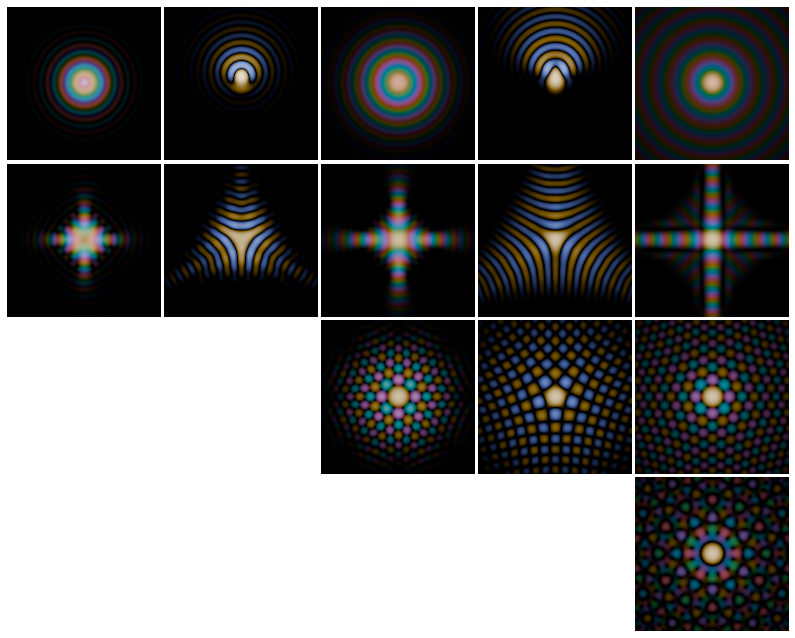

In [22]:
import abtem
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from myst_nb import glue

abtem.config.set({"local_diagnostics.progress_bar": False})


def make_aberrations_grid_plot(func, coefficient_scaling=60, **kwargs):
    nrows, ncols = (4, 5)

    fig = plt.figure(1, figsize=(14, 14))

    axes = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), **{"axes_pad": 0.05},)

    domain_coloring_kwargs = {}

    magnitude = coefficient_scaling
    for n in range(5):

        i = 0
        for m in range(7):
            coefficient = f"C{n + 1}{m}"

            try:
                image = func({coefficient: magnitude})
            except ValueError:
                continue

            k = np.ravel_multi_index((i, n), (nrows, ncols))
            i += 1

            image.show(
                ax=axes[k], domain_coloring_kwargs=domain_coloring_kwargs, **kwargs
            )
            axes[k].axis("off")

        for j in range(i, 4):
            k = np.ravel_multi_index((j, n), (nrows, ncols))
            axes[k].set_axis_off()

        magnitude *= coefficient_scaling
    plt.close()
    return fig


# def ctf_func(aberrations):
#    ctf = abtem.CTF(energy=100e3, semiangle_cutoff=30, **aberrations)
#    images = ctf.image(gpts=(128, 128), max_angle=30)
#    return images * 1.8

fourier_space = make_aberrations_grid_plot(probe_func)

fourier_space

# real_space = make_ctf_coeff_grid_plot(ctf_func)

# glue("ctf_visualization_real", fourier_space, display=False)
# glue("ctf_visualization_fourier", real_space, display=False)

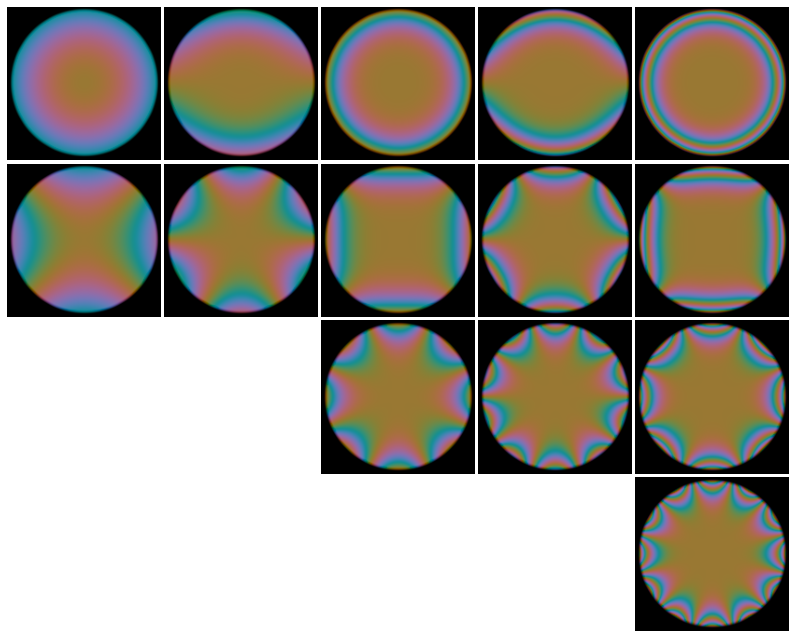

In [100]:

def make_disc(aberrations):
    disc = (
        abtem.Probe(
            energy=100e3,
            semiangle_cutoff=30,
            gpts=(512, 512),
            extent=100,
            **aberrations,
        )
        .build()
        .phase_shift(np.pi / 2)
        .as_complex_diffraction(max_angle=30)
    )
    return disc * 2e2



In [40]:
#psfs

(<Figure size 432x288 with 2 Axes>,
 <Axes:xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

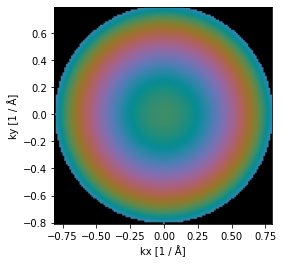

In [77]:
ctf_func({"defocus": 100}).show()

In [6]:
import cplot
from abtem.visualize.utils import domain_coloring

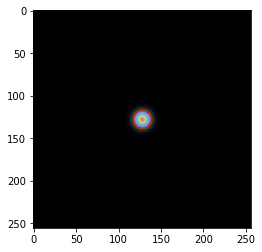

In [15]:
def probe_func():
    probe = abtem.Probe(
        energy=100e3, semiangle_cutoff=30, gpts=(256, 256), extent=50, C10=70
    )
    images = probe.build().complex_images()  # .crop(extent=(10, 10), offset=(20, 20))
    return images  # getattr(images, convert_complex)()


domain_coloring_kwargs = {
    "saturation_adjustment": 2,
    "abs_scaling": lambda x: x ** 1.5 / (1 + x ** 1.5),
}

arr = probe_func().array * 1e4

plt.imshow(cplot.get_srgb1(arr, **domain_coloring_kwargs))

In [12]:
np.minimum([1, 1], [2, 2, 2])

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [9]:
30 / 180 * np.pi

0.5235987755982988

# Visualized aberrations

```{ctf_visualization_real}
```

`````{tab-set}

````{tab-item} conda

```{glue:} ctf_visualization_fourier
```

````
````{tab-item} pip

```{glue:} ctf_visualization_real
```

````
`````